# ISYS2407 Information Systems Solutions & Design

# Assignment 3 

# Model 1

#### Student name:  Hewa Pattinige Kemith Nanayakkara

#### Student number: S3771628

# 1 Import libraries

In [1]:
# Import the library for pickling
import joblib

# Library needed for counting categorical values
import collections

# Also need pandas here
import pandas as pd

# Library to scale values
from sklearn.preprocessing import StandardScaler

# Library for replacing labels with numbers
from sklearn.preprocessing import LabelEncoder

# Libary needed for onehot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
# Just use pandas get_dummies which is a lot easier to use

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Library for performing grid search
from sklearn.model_selection import GridSearchCV

# Import the model library
from sklearn.ensemble import RandomForestClassifier

# Import the libraries for computing the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# 2 Load the cleaned data

#### Pickled file must exist in your folder

In [2]:
# Load the pickled file
employeeattrition_df = joblib.load('employeeattrition.pkl')  

# Check
employeeattrition_df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,...,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,Unsatisfied,Female,94,...,Very Unsatisfied,0,8,0,Extremely Unbalanced,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Satisfied,Male,61,...,Very Satisfied,1,10,3,Balanced,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,Very Satisfied,Male,92,...,Unsatisfied,0,7,3,Balanced,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Very Satisfied,Female,56,...,Satisfied,0,8,3,Balanced,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,Very Unsatisfied,Male,40,...,Very Satisfied,1,6,3,Balanced,2,2,2,2,0


# 3 Split the data into training and testing set

In [3]:
# Store the features in variable X (uppercase as there are multiple features)
feature_cols = ['age', 'daily_rate', 
    'monthly_income', 'monthly_rate', 
    'total_working_years', 'years_at_company',
    'years_in_current_role',
    'years_with_curr_manager']


X = employeeattrition_df[feature_cols]

# Store the labels/target in variable y (lower case as its a single value)
y = employeeattrition_df['attrition']

# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # keep 20% for testing
                                                    random_state=2 # pass an int for reproducible rtesult
                                                    )

# 4 Data Transformations to improve modelling performance

## 4.1 Scale the columns with continuous values

In [4]:
# 1. Select the columns to scale
columns_to_scale = [ 
    'age',
    'daily_rate',
    'monthly_income', 'monthly_rate',
    'total_working_years',
    'years_at_company',
    'years_in_current_role',
    'years_with_curr_manager'
]

# 2. Make copy of the training and testing sets fix the issue below
X_train = X_train.copy()
X_test = X_test.copy()

# 3. Instantiate a scaler
scaler = StandardScaler()
    
# 4. Fit the scaler on the training column and transform the training and testing columns 
for col in columns_to_scale:
    # Must reshape the numpy array returned b the scaler from 1D to 2D
    scaler.fit(X_train[col].values.reshape(-1, 1))
    # Then transform both the training and testing sets
    X_train[col] = scaler.transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))

# Check
print(X_train.shape, X_test.shape)

(1176, 8) (294, 8)


In [5]:
# Check again
X_train.head()

,age,daily_rate,monthly_income,monthly_rate,total_working_years,years_at_company,years_in_current_role,years_with_curr_manager
285,0.020782,1.397274,-1.052118,0.215234,0.738591,1.658942,2.125569,0.790100
194,0.901489,0.964352,-0.169777,0.855546,1.378762,2.153638,1.032220,1.066471
323,-0.970013,0.871408,-0.627625,1.453087,-0.797818,-0.649639,-0.607803,-0.591753
1015,-0.309483,-0.588787,-0.774892,0.830666,-0.157647,-0.484740,-0.334466,-0.315382
1003,-1.300279,0.362663,-0.701573,-1.318245,-0.541750,-0.649639,-0.607803,-0.591753


In [6]:
# Check again
X_test.head()

,age,daily_rate,monthly_income,monthly_rate,total_working_years,years_at_company,years_in_current_role,years_with_curr_manager
721,1.451931,0.338204,2.679265,-1.422937,1.378762,0.834449,1.852232,0.237359
843,-1.190190,1.426624,-0.326799,-0.128614,-0.413716,0.174854,0.758883,0.790100
627,1.672108,0.218356,2.633008,0.655108,2.531069,0.339753,1.032220,-1.144494
1368,-0.309483,-0.160757,0.090771,1.698952,0.610557,1.329145,1.578894,1.895582
305,-0.089306,0.744222,0.067800,-1.036317,-0.029613,0.339753,1.032220,1.066471


## 4.2 Label Encoding Data Transformation

In [7]:
# # 1. Select the columns to label encode
# columns_to_encode = [
#     'business_travel', 'department',
#     # gender,
#     'education_field', 'environment_satisfaction', 'job_role',
#     'job_satisfaction', 'marital_status', 'overtime', 
#     'relationship_satisfaction', 'work_life_balance'
# ]

# # 2. Make copy of the training and testing sets fix the issue below
# X_train = X_train.copy()
# X_test = X_test.copy()

# # 3. Instantiate a LabelEncoder
# encoder = LabelEncoder()

# # 4. Fit the encoder on the training column and transform the training and testing columns
# for col in columns_to_encode:
#     # First fit the encoder to the training data
#     encoder.fit(X_train[col])
#     # Then transform both the training and the testing sets
#     X_train[col] = encoder.transform(X_train[col])
#     X_test[col] = encoder.transform(X_test[col])

# # Check
# X_train.head()

## 4.3 Label Hotcoding Data Transformation

In [8]:
# # 1. Select the columns to one-hot encode
# columns_to_onehot_encode = [
# #     'business_travel', 'department',
#     'gender'
# #     'education_field', 'environment_satisfaction', 'job_role',
# #     'job_satisfaction', 'marital_status', 'overtime', 
# #     'relationship_satisfaction', 'work_life_balance'
# ]

# # 2 Instantiate a one-hot encoder
# enc = LabelBinarizer()

# # 3. Fit the encoder on the training column and transform the training and testing columns
# for col in columns_to_onehot_encode:
#     ## Fix X_train
#     dummies_df = pd.get_dummies(X_train[col], prefix="gdr") # generate dataframe of dummies
#     X_train.drop([col], axis=1, inplace=True) # drop original column
#     X_train = pd.concat([X_train, dummies_df], axis=1) # concatenate both dataframes
#     ## Fix X_test
#     dummies_df = pd.get_dummies(X_test[col], prefix="gdr")
#     X_test.drop([col], axis=1, inplace=True)
#     X_test = pd.concat([X_test, dummies_df], axis=1)

     
# # Check
# X_train.head()

# 5 Modelling

## 5.1 Initial/baseline model

### 5.1.1 Fit initial model

In [9]:
# Instantiate model and fit on training data
rf_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# Predict using test data
y_pred = rf_model.predict(X_test)

# Quick check
print(y_pred[:5])

[0 0 0 0 0]


### 5.1.1 Evaluate model

accuracy: 0.8469387755102041
precision: 0.6
recall: 0.1875
F1 score: 0.2857142857142857
[[240   6]
 [ 39   9]]


Text(50.0, 0.5, 'True')

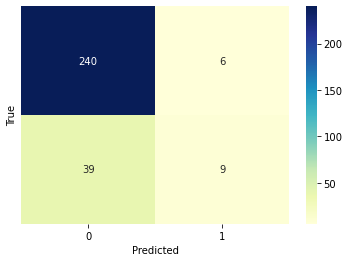

In [10]:
# Compute performance metrics of the baseline model
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# visualise the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt="d", yticklabels=False, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')

# Continuation of the rest of the modelling steps...

## 5.2 Improved model

### 5.2.1 Use grid search to find best hyperameters (details in grid search notebook)

In [11]:
# List of relevant params
#     n_estimators: int, default=100
#     criterion: {“gini”, “entropy”}, default=”gini”
#     max_depth: int, default=None
#     min_samples_split: int or float, default=2
#     min_samples_leaf: int or float, default=1
#     min_weight_fraction_leaf: float, default=0.0
#     max_features: {“auto”, “sqrt”, “log2”}, int or float, default=”auto”
#     max_leaf_nodes: int, default=None
param_grid = [
              {"criterion": ["gini", "entropy"], "n_estimators": range(1, 20)}
             ]

# Instantiate a grid search object and fit it to the training data
clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, verbose=0, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}, score: {grid.best_score_:0.2f}")

Best params: {'criterion': 'gini', 'n_estimators': 3}, score: 0.26


### 5.2.2 Fit improved model

In [12]:
# Instantiate model and fit on training data
rf_model = RandomForestClassifier(criterion= 'gini', n_estimators=3).fit(X_train, y_train)

# Predict using test data
y_pred = rf_model.predict(X_test)

# Quick check
print(y_pred[:5])

[0 0 0 0 0]


### 5.2.3 Evaluate  improved model

accuracy: 0.7925170068027211
precision: 0.30303030303030304
recall: 0.20833333333333334
F1 score: 0.2469135802469136
[[223  23]
 [ 38  10]]


Text(50.0, 0.5, 'True')

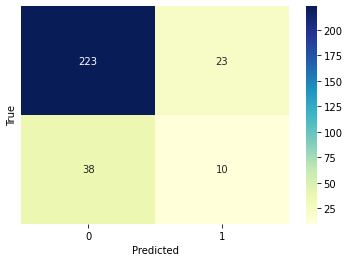

In [13]:
# Compute performance metrics of the baseline model
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# visualise the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt="d", yticklabels=False, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')

# 6 Save the model for further evaluation (in another notebook)
#### Should also save the train/test sets

In [ ]:
# Pickle the model for later evaluation
joblib.dump(rf_model, 'model-rf-feat-sel.pkl')  # # Use the right model name and a suitable file name

# Also need to pickle the training and testing sets
joblib.dump(X_train, 'X_train.pkl') 
joblib.dump(X_test, 'X_test.pkl') 
joblib.dump(y_train, 'y_train.pkl') 
joblib.dump(y_test, 'y_test.pkl')

# Note: make sure that the model and the training/testing sets match 
# i.e. the model was built using this particular training set
# and the testing set matches this partiular training